# Homework 1

参与者：盛文哲，刘任达

贡献：

盛文哲：
- 完成了背景介绍，使用场景介绍
- 完成了对数据的预处理
- 完成了前期的代码建构基础，包括网络框架、训练函数、实验结果分类等
- 完成了前四个实验：
    - 实验1：探究网络隐藏层结构对于模型的影响
    - 实验2：探究Dropout率对于模型的影响
    - 实验3：探究Batchsize对于模型的影响
    - 实验4：探究优化器对于模型的影响

刘任达：
- 改进了前面的代码结构，使`run_experiment`函数可以进行自定义的实验
- 重新对前四组数据进行了实验，加入了对时间记录进行效率上的分析
- 完成了后四个实验：
    - 实验5：探究学习率对于模型的影响
    - 实验6：探究Batchnorm使用与否对于模型的影响
    - 实验7：探究动量对于模型的影响
    - 实验8：探究激活函数对于模型的影响
- 撰写总结内容

In [2]:
import pandas as pd
import numpy as np

# 读取数据
pbmc_data = pd.read_csv('pbmc_data.csv')
# 随机展示10行
print(pbmc_data.sample(n=100))

            Unnamed: 0   TNFRSF4    CPSF3L    ATAD3C   C1orf86      RER1  \
1240  CGGGACTGCGTGTA-1 -0.293266 -0.343559 -0.056685  1.136136 -0.777691   
1470  GAACCTGAACGTGT-1  2.411039 -0.364193 -0.056293 -0.667349  0.689550   
1475  GAACTGTGCCAGTA-1 -0.253751 -0.260971 -0.049340 -0.436383 -0.478725   
2637  TTTGCATGCCTCAC-1 -0.333789 -0.253588 -0.052716 -0.425292 -0.457937   
327   ACGTGATGGGTCTA-1 -0.272224 -0.282360 -0.051640 -0.485445 -0.556737   
...                ...       ...       ...       ...       ...       ...   
626   ATCAACCTTTGTCT-1 -0.268999 -0.280209 -0.051343 -0.480418  1.607445   
2553  TTCAGTTGTCTAGG-1 -0.263630 -0.221869 -0.047242 -0.349640 -0.339206   
1294  CTACGCACTGGTCA-1 -0.251435 -0.277435 -0.050313 -0.473029 -0.537598   
762   ATTGCACTTGCTTT-1 -0.343592 -0.363620 -0.060434 -0.671927  1.358058   
989   CATTGTACTTATCC-1 -0.145956 -0.251882 -0.043541 -0.408771 -0.438467   

      TNFRSF25   TNFRSF9  CTNNBIP1       SRM  ...     BACE2      SIK1  \
1240 -0.330219

## 数据说明：注：以下的内容主要来自生科院同学+Deepseek-R1+Wiki百科的解释
我们需要处理的应该是RNA测序的数据
第一列数据表示barcode,代表一个细胞
其他列都是基因的名称，数值代表表达量。
最后两列是cell type，数值编号和名称。

## 研究背景：
单细胞测序技术的突破（如10x Genomics、Smart-seq2）使得在单个细胞水平解析基因表达成为可能。传统Bulk RNA测序仅能提供细胞群体的平均表达谱，掩盖了细胞异质性，而单细胞技术揭示了外周血中免疫细胞的多样性。外周血作为免疫系统的主要载体，包含T细胞、B细胞、自然杀伤细胞（NK）、单核细胞等多种免疫亚群，其动态变化与感染、癌症、自身免疫疾病等密切相关。

## 外周血研究的核心价值
免疫细胞异质性解析：例如，CD8+ T细胞可进一步分为效应T细胞、记忆T细胞和耗竭T细胞，单细胞测序能精准区分这些亚群并揭示其功能状态。

疾病机制探索：在癌症中，外周血循环肿瘤细胞（CTCs）和免疫细胞组成可反映肿瘤微环境的状态；在COVID-19中，单细胞数据揭示了重症患者中单核细胞的过度炎症反应。

生物标志物发现：通过对比健康人与患者的细胞亚群比例或差异基因，可筛选潜在诊断标志物或治疗靶点（如PD-1在耗竭T细胞中的高表达）。

## 医学应用场景
肿瘤免疫治疗：分析患者外周血中免疫细胞的功能状态，预测PD-1/PD-L1抑制剂疗效。

自身免疫疾病：系统性红斑狼疮（SLE）患者外周血中浆细胞样树突状细胞（pDC）的异常活化提示I型干扰素信号通路的激活。

感染性疾病：HIV感染中CD4+ T细胞的耗竭轨迹可通过单细胞轨迹分析（如Monocle）重建。



## RNA测序的发展历史：
RNA测序技术自20世纪70年代起经历了多代技术革新，其发展历程可分为以下三个阶段：

1. 第一代测序技术：Sanger测序（1975-2005）
基于链终止法（双脱氧法），通过荧光标记ddNTP终止DNA链延伸，结合毛细管电泳读取序列。其特点是准确性高（误差率<0.1%），但通量低、成本高，主要用于少量RNA转录本的验证，如单个基因的剪接变体分析。

2. 第二代测序技术（NGS，2005-2015）
以Illumina、Ion Torrent为代表的高通量测序技术，通过边合成边测序（SBS）实现大规模平行测序。NGS的核心优势在于通量高、成本低，能够同时分析全转录组，支持差异基因表达、可变剪接、融合基因等研究。例如，Ion Torrent平台支持靶向转录组测序，可检测超过20,000个基因的表达。

3. 第三代测序技术（单分子测序，2015至今）
以PacBio和Oxford Nanopore为代表，无需PCR扩增，直接对RNA或cDNA进行长读长测序。Oxford Nanopore的直接RNA测序技术可捕获全长转录本，同时检测RNA修饰（如m6A），解决了短读长技术无法解析复杂剪接异构体和表观修饰的难题。此外，单细胞RNA测序（如10x Genomics、Takara的Shasta系统）实现了单细胞分辨率的转录组分析，揭示细胞异质性。

## RNA测序的实现方法
RNA测序的流程通常包括以下关键步骤：

1. 样本制备与文库构建
RNA提取与富集：从组织或细胞中提取总RNA，通过poly-A捕获富集mRNA或保留非编码RNA（如lncRNA、miRNA）。

cDNA合成与建库：将RNA反转录为cDNA，添加测序接头和条形码（Barcode）。例如，Takara的Shasta单细胞系统通过微孔芯片实现单细胞分选与文库构建，每个孔可容纳单个细胞并添加特异性条形码，支持高通量单细胞测序。

2. 测序技术选择
短读长测序（NGS）：适用于基因表达定量和剪接分析，如Illumina平台生成150-300 bp读长数据。

长读长测序（三代测序）：如Oxford Nanopore直接测序RNA分子，读长可达数万碱基，用于解析全长转录本和RNA修饰。

3. 数据分析
比对与定量：使用STAR、Kallisto等工具将测序reads比对到参考基因组，统计基因或转录本表达量（如TPM、FPKM）。

差异表达与功能分析：通过DESeq2、edgeR等工具鉴定差异基因，结合GO/KEGG通路富集分析功能。

高级应用：单细胞数据分析（如UMAP降维、细胞聚类）、融合基因检测（如STAR-Fusion）等。

## RNA测序的具体功能
1. 基因表达定量与差异分析
RNA-Seq可精确量化基因表达水平，比较不同条件（如疾病vs健康）下的差异表达基因。例如，肿瘤组织中EGFR mRNA的高表达可通过RNA-Seq检测，并用于癌症分型。

2. 转录本结构与剪接分析
可变剪接：鉴定同一基因的不同剪接异构体，如癌症中常见的异常剪接事件。

新转录本发现：长读长测序揭示未注释的转录本，如lncRNA或融合基因（如BCR-ABL1）。

3. 表观转录组学研究
直接RNA测序技术（如Oxford Nanopore）可检测RNA修饰（如m6A、假尿苷酸），揭示其在基因调控和疾病中的作用。例如，m6A修饰在神经退行性疾病中的异常分布。

4. 单细胞分辨率研究
单细胞RNA测序（scRNA-seq）解析细胞异质性，如外周血中T细胞亚群（效应T细胞、记忆T细胞）的功能差异，或肿瘤微环境中免疫细胞的动态变化。





In [3]:
print(f"数据大小:{pbmc_data.shape}")
print(f"列索引如下:")
print(pbmc_data.columns) #基因、细胞种类数码与名称
print("细胞类型编码与名称的对应关系:")
cell_types = dict(zip(pbmc_data['cell_type'], pbmc_data['cell_type_string']))

for code, name in sorted(cell_types.items()):
    print(f"{code}: {name}")


数据大小:(2638, 1841)
列索引如下:
Index(['Unnamed: 0', 'TNFRSF4', 'CPSF3L', 'ATAD3C', 'C1orf86', 'RER1',
       'TNFRSF25', 'TNFRSF9', 'CTNNBIP1', 'SRM',
       ...
       'BACE2', 'SIK1', 'C21orf33', 'ICOSLG', 'SUMO3', 'SLC19A1', 'S100B',
       'PRMT2', 'cell_type', 'cell_type_string'],
      dtype='object', length=1841)
细胞类型编码与名称的对应关系:
0: CD4 T
1: CD14 Monocytes
2: B
3: CD8 T
4: NK
5: FCGR3A Monocytes
6: Dendritic
7: Megakaryocytes


看了下，有2638个细胞数据

每个细胞有1838个基因对应的表达量

并且一共有8种细胞，分别对应0~7的数字编码。



In [5]:
#搭建网络框架 这里采取带有batchnorm 和残差连接的 DNN

import torch
import torch.nn as nn
import torch.nn.functional as F

class DeepClassifier(nn.Module):
    def __init__(self, input_dim=1838, hidden_dims=[512, 256, 128], output_dim=8, use_batchnorm=True, activation = nn.ReLU()):
        super().__init__()
        self.layers = nn.ModuleList()
        
        # 输入层
        self.input_layer = nn.Sequential(
            nn.Linear(input_dim, hidden_dims[0]),
            nn.BatchNorm1d(hidden_dims[0]),
            activation,
            nn.Dropout(0.3)
        )
        
        # 隐藏层（带残差连接）
        for i in range(len(hidden_dims)-1):
            self.layers.append(
                ResidualBlock(hidden_dims[i], hidden_dims[i+1], use_batchnorm = use_batchnorm, activation = activation)
            )
            
        # 输出层
        self.output_layer = nn.Linear(hidden_dims[-1], output_dim)
        
    def forward(self, x):
        x = self.input_layer(x)
        for layer in self.layers:
            x = layer(x)
        return self.output_layer(x)

class ResidualBlock(nn.Module):
    def __init__(self, in_dim, out_dim, use_batchnorm=True, dropout_rate = 0.3, activation = nn.ReLU()):
        super().__init__()
        self.activation = activation
        self.fc1 = nn.Linear(in_dim, out_dim) 
        self.bn1 = nn.BatchNorm1d(out_dim) if use_batchnorm else nn.Identity() #归一化
        self.fc2 = nn.Linear(out_dim, out_dim)
        self.bn2 = nn.BatchNorm1d(out_dim) if use_batchnorm else nn.Identity()
        self.dropout = nn.Dropout(dropout_rate)
        
        # 如果输入输出维度不同，添加一个线性映射
        self.shortcut = nn.Linear(in_dim, out_dim) if in_dim != out_dim else nn.Identity()
        
    def forward(self, x):
        identity = self.shortcut(x)
        
        x = self.activation(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = self.bn2(self.fc2(x))
        
        x += identity
        x = self.activation(x)
        return x

In [6]:
#训练器
def train_classifier(model, train_loader, val_loader, num_epochs=100):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    
    # 使用Adam优化器:0.001学习率，1e-4的L2正则项
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
    
    # 学习率调度器
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, 
        mode='min', 
        factor=0.5, #学习率调整因子，如果损失不下降就将学习率减半
        patience=5, #容忍5个epoch验证损失不下降
        verbose=True #打印学习率变化信息
    )
    
    # 损失函数：采用交叉熵
    criterion = nn.CrossEntropyLoss()# 注意这里用了交叉熵之后原网络中输出就不需要加softmax层了
    
    
    for epoch in range(num_epochs):
        # 训练阶段
        model.train()
        train_loss = 0
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            
        # 验证阶段
        model.eval()
        val_loss = 0
        correct = 0
        total = 0
        
        with torch.no_grad():
            for batch_X, batch_y in val_loader:
                batch_X, batch_y = batch_X.to(device), batch_y.to(device)
                outputs = model(batch_X)
                loss = criterion(outputs, batch_y)
                val_loss += loss.item()
                
                _, predicted = outputs.max(1)
                total += batch_y.size(0)
                correct += predicted.eq(batch_y).sum().item()
        
        val_acc = 100. * correct / total #准确率
        val_loss = val_loss / len(val_loader)
        
        # 更新学习率
        scheduler.step(val_loss)
        
            
        print(f'Epoch {epoch+1}/{num_epochs}:')
        print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')

In [7]:
#数据预处理
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
def pre_process(data,batch_size=32):
    #分离特征和标签
    X = data.iloc[:,1:1839].values
    Y = data.iloc[:, 1839].values.astype(np.int64)

    #标准化
    scaler = StandardScaler()
    X = scaler.fit_transform(X) #标准化为均值0，方差1的数据分布

    #划分training_set validation set
    X_train, X_val, y_train, y_val = train_test_split(
        X, Y, 
        test_size=0.2, #验证集占0.2
        random_state=42, 
        stratify=Y
    )
    # 转换为张量
    X_train = torch.FloatTensor(X_train)
    y_train = torch.LongTensor(y_train)
    X_val = torch.FloatTensor(X_val)
    y_val = torch.LongTensor(y_val)

    # 创建数据加载器
    train_dataset = TensorDataset(X_train, y_train)
    val_dataset = TensorDataset(X_val, y_val)
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)
    
    return train_loader, val_loader


In [8]:
#首次训练 baseline
train_loader, val_loader = pre_process(pbmc_data,batch_size=32)
model = DeepClassifier(
    input_dim=1838,
    hidden_dims=[512,256,128,64],
    output_dim=8
)
# 2. 记录开始时间
import time
start_time = time.time()

# 3. 训练模型
print("开始训练...")
# 2. 调用训练器进行训练
train_classifier(
    model=model,
    train_loader=train_loader,  # 之前预处理得到的训练数据加载器
    val_loader=val_loader,      # 之前预处理得到的验证数据加载器
    num_epochs=500              # 训练轮数
)
# 4. 打印训练时间
training_time = time.time() - start_time
print(f'\n训练完成')
print(f'总训练时间: {training_time:.2f} 秒')

# 5. 在验证集上进行最终评估
model.eval()
correct = 0
total = 0
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

with torch.no_grad():
    for batch_X, batch_y in val_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        outputs = model(batch_X)
        _, predicted = outputs.max(1)
        total += batch_y.size(0)
        correct += predicted.eq(batch_y).sum().item()

final_acc = 100. * correct / total
print(f'最终验证集准确率: {final_acc:.2f}%')

开始训练...


d:\anaconda3\Lib\site-packages\torch\optim\lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/500:
Val Loss: 0.3925, Val Acc: 84.47%
Epoch 2/500:
Val Loss: 0.2368, Val Acc: 93.94%
Epoch 3/500:
Val Loss: 0.2858, Val Acc: 92.80%
Epoch 4/500:
Val Loss: 0.2662, Val Acc: 93.75%
Epoch 5/500:
Val Loss: 0.2701, Val Acc: 93.56%
Epoch 6/500:
Val Loss: 0.3083, Val Acc: 92.80%
Epoch 7/500:
Val Loss: 0.2980, Val Acc: 94.70%
Epoch 8/500:
Val Loss: 0.3026, Val Acc: 94.70%
Epoch 9/500:
Val Loss: 0.2833, Val Acc: 94.70%
Epoch 10/500:
Val Loss: 0.2912, Val Acc: 95.08%
Epoch 11/500:
Val Loss: 0.3541, Val Acc: 94.32%
Epoch 12/500:
Val Loss: 0.3684, Val Acc: 94.13%
Epoch 13/500:
Val Loss: 0.3634, Val Acc: 93.94%
Epoch 14/500:
Val Loss: 0.3892, Val Acc: 93.94%
Epoch 15/500:
Val Loss: 0.3785, Val Acc: 93.56%
Epoch 16/500:
Val Loss: 0.3336, Val Acc: 93.56%
Epoch 17/500:
Val Loss: 0.3515, Val Acc: 94.13%
Epoch 18/500:
Val Loss: 0.3491, Val Acc: 93.37%
Epoch 19/500:
Val Loss: 0.3883, Val Acc: 93.56%
Epoch 20/500:
Val Loss: 0.4154, Val Acc: 93.56%
Epoch 21/500:
Val Loss: 0.3923, Val Acc: 93.56%
E

接下来开始做数值实验，看各种超参数对结果的影响。

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from torch.utils.data import DataLoader, TensorDataset

# 实验结果记录器
class ExperimentLogger:
    def __init__(self):
        self.results = {
            'param_name': [],
            'param_value': [],
            'best_val_acc': [],      # 过程中的最高准确率
            'final_val_acc': [],     # 最终准确率
            'training_time': [],
            'convergence_epoch': [],
            'val_loss_history': [],
            'val_acc_history': []
        }

    
    def add_result(self, param_name, param_value, best_acc, final_acc, train_time, conv_epoch, loss_history, acc_history):
        self.results['param_name'].append(param_name)
        self.results['param_value'].append(param_value)
        self.results['best_val_acc'].append(best_acc)
        self.results['final_val_acc'].append(final_acc)
        self.results['training_time'].append(train_time)
        self.results['convergence_epoch'].append(conv_epoch)
        self.results['val_loss_history'].append(loss_history)
        self.results['val_acc_history'].append(acc_history)
    
    def print_summary(self):
        df = pd.DataFrame({
            'Parameter': [f"{name}={val}" for name, val in zip(
                self.results['param_name'], self.results['param_value'])],
            'Best Accuracy (%)': [f"{acc:.2f}" for acc in self.results['best_val_acc']],
            'Final Accuracy (%)': [f"{acc:.2f}" for acc in self.results['final_val_acc']],
            'Training Time (s)': [f"{time:.2f}" for time in self.results['training_time']],
            'Convergence Epoch': self.results['convergence_epoch']
        })
        print("\nExperiment Summary:")
        print(df)
        
        # 按参数类型分组显示最佳结果
        param_types = set(self.results['param_name'])
        print("\n最佳表现总结：")
        for param_type in param_types:
            indices = [i for i, name in enumerate(self.results['param_name']) if name == param_type]
            best_idx = max(indices, key=lambda i: self.results['best_val_acc'][i])
            
            print(f"\n{param_type}实验:")
            print(f"最佳参数值: {self.results['param_value'][best_idx]}")
            print(f"最高准确率: {self.results['best_val_acc'][best_idx]:.2f}%")
            print(f"最终准确率: {self.results['final_val_acc'][best_idx]:.2f}%")
    def plot_training_curves(self, param_name):
        plt.figure(figsize=(16, 12))
        
        # 损失曲线
        plt.subplot(2, 2, 1)
        for i, param_val in enumerate(self.results['param_value']):
            if self.results['param_name'][i] == param_name:
                plt.plot(self.results['val_loss_history'][i], 
                        label=f'{param_name}={param_val}')
        plt.xlabel('Epoch')
        plt.ylabel('Validation Loss')
        plt.title(f'Loss Curves for Different {param_name}')
        plt.legend()
        
        # 准确率曲线
        plt.subplot(2, 2, 2)
        for i, param_val in enumerate(self.results['param_value']):
            if self.results['param_name'][i] == param_name:
                plt.plot(self.results['val_acc_history'][i], 
                        label=f'{param_name}={param_val}')
        plt.xlabel('Epoch')
        plt.ylabel('Validation Accuracy (%)')
        plt.title(f'Accuracy Curves for Different {param_name}')
        plt.legend()
        
        plt.tight_layout()
        plt.show()

        # 准确率曲线（五个epoch平均）
        plt.subplot(2, 2, 3)
        for i, param_val in enumerate(self.results['param_value']): 
            if self.results['param_name'][i] == param_name:
                # 计算每5个epoch的平均值
                smoothed_acc = np.convolve(self.results['val_acc_history'][i], np.ones(5)/5, mode='valid')
                plt.plot(smoothed_acc, label=f'{param_name}={param_val}')
        plt.xlabel('Epoch (Smoothed)')
        plt.ylabel('Validation Accuracy (%)')
        plt.title(f'Smoothed Accuracy Curves for Different {param_name}')
        plt.legend()

        plt.tight_layout()
        plt.show()

        # 用时
        plt.subplot(2, 2, 4)
        x_labels = []
        x_values = []
        for i, param_val in enumerate(self.results['param_value']):
            if self.results['param_name'][i] == param_name:
                plt.bar(f'{param_val}', self.results['training_time'][i])
                x_labels.append(str(param_val))
                x_values.append(self.results['training_time'][i])

        plt.gca().set_xticks(range(len(x_labels)))  # 明确指定刻度位置
        plt.gca().set_xticklabels(x_labels, rotation=45, ha='right')  # 旋转标签
    
        plt.xlabel('Parameter Value')
        plt.ylabel('Training Time (s)')
        plt.title(f'Training Time for Different {param_name}')
        plt.legend()

        plt.tight_layout()
        plt.show()



# 1. 网络结构实验
def hidden_dims_experiment(logger):
    hidden_dims_list = [
        [512, 256, 128],
        [256, 128, 64],
        [1024, 512, 256],
        [512, 256, 128, 64],
        [1024,512,256,128],
        [1024,512,256,128,64]
    ]

    for hidden_dims in hidden_dims_list:
        print(f"\nTesting hidden_dims: {hidden_dims}")
        model = DeepClassifier(input_dim=1838, hidden_dims=hidden_dims, output_dim=8)
        
        start_time = time.time()
        train_loader, val_loader = pre_process(pbmc_data,batch_size=32)
        best_acc, final_acc, conv_epoch, loss_history, acc_history = train_classifier_with_history(
            model, train_loader, val_loader)
        train_time = time.time() - start_time
        
        logger.add_result('hidden_dims', str(hidden_dims), best_acc, final_acc, train_time, 
                         conv_epoch, loss_history, acc_history)
        
# 2. Dropout率实验
def dropout_rate_experiment(logger):
    dropout_rates = [0.2, 0.3, 0.4, 0.5] 
    for rate in dropout_rates:
        print(f"\nTesting dropout_rate: {rate}")
        model = DeepClassifier(input_dim=1838, hidden_dims=[512, 256, 128], output_dim=8)
        for m in model.modules():
            if isinstance(m, nn.Dropout):
                m.p = rate
        
        start_time = time.time()
        best_acc,final_acc, conv_epoch, loss_history, acc_history = train_classifier_with_history(
            model, train_loader, val_loader)
        train_time = time.time() - start_time
        
        logger.add_result('dropout_rate', rate, best_acc, final_acc,train_time, 
                         conv_epoch, loss_history, acc_history)
        
# 3. Batch Size实验
def batch_size_experiment(logger):
    batch_sizes = [16, 32, 64, 128]
    for batch_size in batch_sizes:
        print(f"\nTesting batch_size: {batch_size}")
        # 重新创建数据加载器
        train_loader_temp, val_loader_temp = pre_process(pbmc_data, batch_size=batch_size)
        model = DeepClassifier(input_dim=1838, hidden_dims=[512, 256, 128], output_dim=8)
        
        start_time = time.time()
        best_acc, final_acc,conv_epoch, loss_history, acc_history = train_classifier_with_history(
            model, train_loader_temp, val_loader_temp)
        train_time = time.time() - start_time
        
        logger.add_result('batch_size', batch_size, best_acc,final_acc, train_time, 
                         conv_epoch, loss_history, acc_history)

# 4. 优化器实验
def optimizer_experiment(logger):
    optimizers = {
        'Adam': lambda params: torch.optim.Adam(params, lr=0.001, weight_decay=1e-4),
        'SGD': lambda params: torch.optim.SGD(params, lr=0.01, momentum=0.9, weight_decay=1e-4)
    }
    
    for opt_name, opt_fn in optimizers.items():
        print(f"\nTesting optimizer: {opt_name}")
        model = DeepClassifier(input_dim=1838, hidden_dims=[512, 256, 128], output_dim=8)
        
        start_time = time.time()
        best_acc, final_acc,conv_epoch, loss_history, acc_history = train_classifier_with_history(
            model, train_loader, val_loader, optimizer_fn=opt_fn)
        train_time = time.time() - start_time
        
        logger.add_result('optimizer', opt_name, best_acc,final_acc, train_time, 
                         conv_epoch, loss_history, acc_history)

experiment_list = [
    hidden_dims_experiment,
    dropout_rate_experiment,
    batch_size_experiment,
    optimizer_experiment
]


# 进行实验
def run_experiments():
    logger = ExperimentLogger()
    
    for experiment in experiment_list:
        experiment(logger)

    
    # 打印实验总结
    logger.print_summary()
    
    # 绘制训练曲线
    logger.plot_training_curves('hidden_dims')
    logger.plot_training_curves('dropout_rate')
    logger.plot_training_curves('batch_size')
    logger.plot_training_curves('optimizer')

# 修改训练器以支持自定义优化器
def train_classifier_with_history(model, train_loader, val_loader, num_epochs=500, lr = 0.001, optimizer_fn=None):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    
    # 使用传入的优化器函数或默认的Adam
    optimizer = optimizer_fn(model.parameters()) if optimizer_fn else \
               torch.optim.Adam(model.parameters(), lr = lr, weight_decay=1e-4)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', factor=0.5, patience=5, verbose=True
    )
    criterion = nn.CrossEntropyLoss()
    
    # 记录训练历史
    history = {
        'val_loss': [],
        'val_acc': []
    }
    best_val_acc = 0
    final_val_acc = 0
    convergence_epoch = num_epochs
    
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            
        model.eval()
        val_loss = 0
        correct = 0
        total = 0
        
        with torch.no_grad():
            for batch_X, batch_y in val_loader:
                batch_X, batch_y = batch_X.to(device), batch_y.to(device)
                outputs = model(batch_X)
                loss = criterion(outputs, batch_y)
                val_loss += loss.item()
                
                _, predicted = outputs.max(1)
                total += batch_y.size(0)
                correct += predicted.eq(batch_y).sum().item()
        
        val_acc = 100. * correct / total
        final_val_acc = val_acc
        val_loss = val_loss / len(val_loader)
        
        # 记录历史
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        
        # 更新最佳准确率
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            convergence_epoch = epoch + 1
        
        # 更新学习率
        scheduler.step(val_loss)
        
        print(f'Epoch {epoch+1}/{num_epochs}:')
        print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
    
    return best_val_acc, final_val_acc,convergence_epoch, history['val_loss'], history['val_acc']


Testing hidden_dims: [512, 256, 128]


d:\anaconda3\Lib\site-packages\torch\optim\lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/500:
Val Loss: 0.2235, Val Acc: 92.80%
Epoch 2/500:
Val Loss: 0.2230, Val Acc: 95.27%
Epoch 3/500:
Val Loss: 0.2853, Val Acc: 93.56%
Epoch 4/500:
Val Loss: 0.3344, Val Acc: 93.94%
Epoch 5/500:
Val Loss: 0.3671, Val Acc: 93.56%
Epoch 6/500:
Val Loss: 0.3216, Val Acc: 94.32%
Epoch 7/500:
Val Loss: 0.3465, Val Acc: 94.13%
Epoch 8/500:
Val Loss: 0.3448, Val Acc: 93.37%
Epoch 9/500:
Val Loss: 0.3467, Val Acc: 93.56%
Epoch 10/500:
Val Loss: 0.3248, Val Acc: 94.51%
Epoch 11/500:
Val Loss: 0.3280, Val Acc: 94.51%
Epoch 12/500:
Val Loss: 0.3674, Val Acc: 93.37%
Epoch 13/500:
Val Loss: 0.3620, Val Acc: 94.51%
Epoch 14/500:
Val Loss: 0.3359, Val Acc: 94.51%
Epoch 15/500:
Val Loss: 0.3316, Val Acc: 94.32%
Epoch 16/500:
Val Loss: 0.3752, Val Acc: 93.75%
Epoch 17/500:
Val Loss: 0.3907, Val Acc: 93.56%
Epoch 18/500:
Val Loss: 0.3429, Val Acc: 95.08%
Epoch 19/500:
Val Loss: 0.3775, Val Acc: 94.51%
Epoch 20/500:
Val Loss: 0.4076, Val Acc: 93.18%
Epoch 21/500:
Val Loss: 0.3954, Val Acc: 93.56%
E

d:\anaconda3\Lib\site-packages\torch\optim\lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/500:
Val Loss: 0.3712, Val Acc: 89.02%
Epoch 2/500:
Val Loss: 0.2219, Val Acc: 93.18%
Epoch 3/500:
Val Loss: 0.2854, Val Acc: 92.80%
Epoch 4/500:
Val Loss: 0.2882, Val Acc: 94.70%
Epoch 5/500:
Val Loss: 0.3378, Val Acc: 93.56%
Epoch 6/500:
Val Loss: 0.3442, Val Acc: 93.94%
Epoch 7/500:
Val Loss: 0.3241, Val Acc: 93.75%
Epoch 8/500:
Val Loss: 0.3515, Val Acc: 93.56%
Epoch 9/500:
Val Loss: 0.3295, Val Acc: 93.56%
Epoch 10/500:
Val Loss: 0.3363, Val Acc: 94.32%
Epoch 11/500:
Val Loss: 0.3159, Val Acc: 93.56%
Epoch 12/500:
Val Loss: 0.3211, Val Acc: 94.51%
Epoch 13/500:
Val Loss: 0.3290, Val Acc: 94.89%
Epoch 14/500:
Val Loss: 0.3493, Val Acc: 94.32%
Epoch 15/500:
Val Loss: 0.3195, Val Acc: 94.70%
Epoch 16/500:
Val Loss: 0.3500, Val Acc: 94.51%
Epoch 17/500:
Val Loss: 0.3621, Val Acc: 94.13%
Epoch 18/500:
Val Loss: 0.3605, Val Acc: 94.32%
Epoch 19/500:
Val Loss: 0.3762, Val Acc: 93.94%
Epoch 20/500:
Val Loss: 0.3481, Val Acc: 94.32%
Epoch 21/500:
Val Loss: 0.3778, Val Acc: 93.94%
E

d:\anaconda3\Lib\site-packages\torch\optim\lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/500:
Val Loss: 0.2037, Val Acc: 93.18%
Epoch 2/500:
Val Loss: 0.2917, Val Acc: 94.13%
Epoch 3/500:
Val Loss: 0.3728, Val Acc: 93.94%
Epoch 4/500:
Val Loss: 0.4086, Val Acc: 93.18%
Epoch 5/500:
Val Loss: 0.3578, Val Acc: 92.61%
Epoch 6/500:
Val Loss: 0.3985, Val Acc: 92.61%
Epoch 7/500:
Val Loss: 0.4459, Val Acc: 93.56%
Epoch 8/500:
Val Loss: 0.3752, Val Acc: 93.56%
Epoch 9/500:
Val Loss: 0.4070, Val Acc: 95.08%
Epoch 10/500:
Val Loss: 0.3950, Val Acc: 94.51%
Epoch 11/500:
Val Loss: 0.4570, Val Acc: 93.75%
Epoch 12/500:
Val Loss: 0.4227, Val Acc: 94.89%
Epoch 13/500:
Val Loss: 0.4519, Val Acc: 94.32%
Epoch 14/500:
Val Loss: 0.4256, Val Acc: 94.13%
Epoch 15/500:
Val Loss: 0.4413, Val Acc: 93.94%
Epoch 16/500:
Val Loss: 0.4297, Val Acc: 94.13%
Epoch 17/500:
Val Loss: 0.4356, Val Acc: 93.75%
Epoch 18/500:
Val Loss: 0.4293, Val Acc: 94.89%
Epoch 19/500:
Val Loss: 0.4354, Val Acc: 94.32%
Epoch 20/500:
Val Loss: 0.4016, Val Acc: 94.70%
Epoch 21/500:
Val Loss: 0.4048, Val Acc: 94.51%
E

d:\anaconda3\Lib\site-packages\torch\optim\lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/500:
Val Loss: 0.3345, Val Acc: 87.12%
Epoch 2/500:
Val Loss: 0.2681, Val Acc: 92.23%
Epoch 3/500:
Val Loss: 0.2662, Val Acc: 93.94%
Epoch 4/500:
Val Loss: 0.4656, Val Acc: 91.67%
Epoch 5/500:
Val Loss: 0.4270, Val Acc: 92.80%
Epoch 6/500:
Val Loss: 0.3319, Val Acc: 92.80%
Epoch 7/500:
Val Loss: 0.3941, Val Acc: 92.42%
Epoch 8/500:
Val Loss: 0.4720, Val Acc: 92.23%
Epoch 9/500:
Val Loss: 0.3662, Val Acc: 94.32%
Epoch 10/500:
Val Loss: 0.4924, Val Acc: 92.61%
Epoch 11/500:
Val Loss: 0.3775, Val Acc: 94.51%
Epoch 12/500:
Val Loss: 0.4578, Val Acc: 92.80%
Epoch 13/500:
Val Loss: 0.4204, Val Acc: 93.75%
Epoch 14/500:
Val Loss: 0.4142, Val Acc: 93.94%
Epoch 15/500:
Val Loss: 0.4544, Val Acc: 93.37%
Epoch 16/500:
Val Loss: 0.3385, Val Acc: 94.89%
Epoch 17/500:
Val Loss: 0.3621, Val Acc: 94.70%
Epoch 18/500:
Val Loss: 0.3565, Val Acc: 94.89%
Epoch 19/500:
Val Loss: 0.3241, Val Acc: 95.08%
Epoch 20/500:
Val Loss: 0.4272, Val Acc: 93.75%
Epoch 21/500:
Val Loss: 0.3749, Val Acc: 94.89%
E

d:\anaconda3\Lib\site-packages\torch\optim\lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/500:
Val Loss: 0.2475, Val Acc: 91.48%
Epoch 2/500:
Val Loss: 0.2949, Val Acc: 91.48%
Epoch 3/500:
Val Loss: 0.3290, Val Acc: 92.80%
Epoch 4/500:
Val Loss: 0.3812, Val Acc: 93.37%
Epoch 5/500:
Val Loss: 0.3116, Val Acc: 93.75%
Epoch 6/500:
Val Loss: 0.4822, Val Acc: 91.67%
Epoch 7/500:
Val Loss: 0.4315, Val Acc: 93.18%
Epoch 8/500:
Val Loss: 0.4510, Val Acc: 92.05%
Epoch 9/500:
Val Loss: 0.3410, Val Acc: 93.37%
Epoch 10/500:
Val Loss: 0.3523, Val Acc: 94.89%
Epoch 11/500:
Val Loss: 0.4124, Val Acc: 92.99%
Epoch 12/500:
Val Loss: 0.4049, Val Acc: 94.13%
Epoch 13/500:
Val Loss: 0.4122, Val Acc: 94.32%
Epoch 14/500:
Val Loss: 0.3921, Val Acc: 94.51%
Epoch 15/500:
Val Loss: 0.4087, Val Acc: 93.56%
Epoch 16/500:
Val Loss: 0.4009, Val Acc: 94.13%
Epoch 17/500:
Val Loss: 0.4519, Val Acc: 93.18%
Epoch 18/500:
Val Loss: 0.4475, Val Acc: 93.75%
Epoch 19/500:
Val Loss: 0.4383, Val Acc: 93.56%
Epoch 20/500:
Val Loss: 0.4307, Val Acc: 94.13%
Epoch 21/500:
Val Loss: 0.4456, Val Acc: 94.13%
E

d:\anaconda3\Lib\site-packages\torch\optim\lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/500:
Val Loss: 0.4650, Val Acc: 87.69%
Epoch 2/500:
Val Loss: 0.2555, Val Acc: 91.67%
Epoch 3/500:
Val Loss: 0.3276, Val Acc: 92.99%
Epoch 4/500:
Val Loss: 0.3436, Val Acc: 93.18%
Epoch 5/500:
Val Loss: 0.3853, Val Acc: 92.05%
Epoch 6/500:
Val Loss: 0.3158, Val Acc: 92.61%
Epoch 7/500:
Val Loss: 0.2557, Val Acc: 94.32%
Epoch 8/500:
Val Loss: 0.3174, Val Acc: 94.51%
Epoch 9/500:
Val Loss: 0.3212, Val Acc: 94.89%
Epoch 10/500:
Val Loss: 0.2883, Val Acc: 94.51%
Epoch 11/500:
Val Loss: 0.4379, Val Acc: 93.18%
Epoch 12/500:
Val Loss: 0.4342, Val Acc: 92.80%
Epoch 13/500:
Val Loss: 0.4380, Val Acc: 94.51%
Epoch 14/500:
Val Loss: 0.3511, Val Acc: 94.51%
Epoch 15/500:
Val Loss: 0.3277, Val Acc: 93.94%
Epoch 16/500:
Val Loss: 0.3702, Val Acc: 94.32%
Epoch 17/500:
Val Loss: 0.3445, Val Acc: 94.51%
Epoch 18/500:
Val Loss: 0.3742, Val Acc: 94.70%
Epoch 19/500:
Val Loss: 0.3477, Val Acc: 94.89%
Epoch 20/500:
Val Loss: 0.3636, Val Acc: 94.32%
Epoch 21/500:
Val Loss: 0.3456, Val Acc: 94.13%
E

d:\anaconda3\Lib\site-packages\torch\optim\lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/500:
Val Loss: 0.2546, Val Acc: 90.72%
Epoch 2/500:
Val Loss: 0.2085, Val Acc: 93.94%
Epoch 3/500:
Val Loss: 0.2658, Val Acc: 93.56%
Epoch 4/500:
Val Loss: 0.2777, Val Acc: 93.56%
Epoch 5/500:
Val Loss: 0.3389, Val Acc: 92.42%
Epoch 6/500:
Val Loss: 0.2746, Val Acc: 92.99%
Epoch 7/500:
Val Loss: 0.2870, Val Acc: 93.94%
Epoch 8/500:
Val Loss: 0.2846, Val Acc: 93.37%
Epoch 9/500:
Val Loss: 0.2512, Val Acc: 94.13%
Epoch 10/500:
Val Loss: 0.2570, Val Acc: 93.75%
Epoch 11/500:
Val Loss: 0.2145, Val Acc: 94.32%
Epoch 12/500:
Val Loss: 0.2912, Val Acc: 93.75%
Epoch 13/500:
Val Loss: 0.2709, Val Acc: 93.75%
Epoch 14/500:
Val Loss: 0.3193, Val Acc: 93.18%
Epoch 15/500:
Val Loss: 0.3008, Val Acc: 93.94%
Epoch 16/500:
Val Loss: 0.2796, Val Acc: 94.51%
Epoch 17/500:
Val Loss: 0.2853, Val Acc: 94.32%
Epoch 18/500:
Val Loss: 0.2832, Val Acc: 94.51%
Epoch 19/500:
Val Loss: 0.2732, Val Acc: 94.51%
Epoch 20/500:
Val Loss: 0.2750, Val Acc: 94.70%
Epoch 21/500:
Val Loss: 0.2909, Val Acc: 94.70%
E

d:\anaconda3\Lib\site-packages\torch\optim\lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/500:
Val Loss: 0.2320, Val Acc: 91.10%
Epoch 2/500:
Val Loss: 0.2192, Val Acc: 93.94%
Epoch 3/500:
Val Loss: 0.2246, Val Acc: 94.32%
Epoch 4/500:
Val Loss: 0.2938, Val Acc: 94.32%
Epoch 5/500:
Val Loss: 0.3764, Val Acc: 92.23%
Epoch 6/500:
Val Loss: 0.3367, Val Acc: 93.18%
Epoch 7/500:
Val Loss: 0.2684, Val Acc: 93.94%
Epoch 8/500:
Val Loss: 0.2980, Val Acc: 94.32%
Epoch 9/500:
Val Loss: 0.3166, Val Acc: 93.56%
Epoch 10/500:
Val Loss: 0.3444, Val Acc: 93.56%
Epoch 11/500:
Val Loss: 0.3379, Val Acc: 93.94%
Epoch 12/500:
Val Loss: 0.3394, Val Acc: 94.89%
Epoch 13/500:
Val Loss: 0.3946, Val Acc: 93.94%
Epoch 14/500:
Val Loss: 0.3883, Val Acc: 94.70%
Epoch 15/500:
Val Loss: 0.3724, Val Acc: 94.13%
Epoch 16/500:
Val Loss: 0.3552, Val Acc: 94.89%
Epoch 17/500:
Val Loss: 0.3828, Val Acc: 94.32%
Epoch 18/500:
Val Loss: 0.3854, Val Acc: 93.75%
Epoch 19/500:
Val Loss: 0.3728, Val Acc: 94.13%
Epoch 20/500:
Val Loss: 0.3709, Val Acc: 94.89%
Epoch 21/500:
Val Loss: 0.3476, Val Acc: 94.89%
E

d:\anaconda3\Lib\site-packages\torch\optim\lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/500:
Val Loss: 0.3003, Val Acc: 89.77%
Epoch 2/500:
Val Loss: 0.2777, Val Acc: 94.51%
Epoch 3/500:
Val Loss: 0.3093, Val Acc: 94.51%
Epoch 4/500:
Val Loss: 0.2830, Val Acc: 94.89%
Epoch 5/500:
Val Loss: 0.3382, Val Acc: 93.94%
Epoch 6/500:
Val Loss: 0.2785, Val Acc: 95.27%
Epoch 7/500:
Val Loss: 0.3718, Val Acc: 93.18%
Epoch 8/500:
Val Loss: 0.3414, Val Acc: 93.94%
Epoch 9/500:
Val Loss: 0.3033, Val Acc: 94.70%
Epoch 10/500:
Val Loss: 0.3797, Val Acc: 94.70%
Epoch 11/500:
Val Loss: 0.3668, Val Acc: 94.51%
Epoch 12/500:
Val Loss: 0.4009, Val Acc: 93.94%
Epoch 13/500:
Val Loss: 0.3788, Val Acc: 94.13%
Epoch 14/500:
Val Loss: 0.4105, Val Acc: 93.75%
Epoch 15/500:
Val Loss: 0.4366, Val Acc: 93.75%
Epoch 16/500:
Val Loss: 0.3862, Val Acc: 93.94%
Epoch 17/500:
Val Loss: 0.3748, Val Acc: 94.32%
Epoch 18/500:
Val Loss: 0.3923, Val Acc: 93.94%
Epoch 19/500:
Val Loss: 0.4004, Val Acc: 93.94%
Epoch 20/500:
Val Loss: 0.3913, Val Acc: 94.13%
Epoch 21/500:
Val Loss: 0.4186, Val Acc: 94.13%
E

d:\anaconda3\Lib\site-packages\torch\optim\lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/500:
Val Loss: 0.5062, Val Acc: 86.17%
Epoch 2/500:
Val Loss: 0.3374, Val Acc: 91.10%
Epoch 3/500:
Val Loss: 0.3298, Val Acc: 94.70%
Epoch 4/500:
Val Loss: 0.3338, Val Acc: 95.27%
Epoch 5/500:
Val Loss: 0.3747, Val Acc: 94.89%
Epoch 6/500:
Val Loss: 0.3881, Val Acc: 95.27%
Epoch 7/500:
Val Loss: 0.3830, Val Acc: 95.83%
Epoch 8/500:
Val Loss: 0.3915, Val Acc: 95.64%
Epoch 9/500:
Val Loss: 0.4020, Val Acc: 95.45%
Epoch 10/500:
Val Loss: 0.4039, Val Acc: 95.45%
Epoch 11/500:
Val Loss: 0.4165, Val Acc: 95.08%
Epoch 12/500:
Val Loss: 0.4096, Val Acc: 95.64%
Epoch 13/500:
Val Loss: 0.4104, Val Acc: 94.89%
Epoch 14/500:
Val Loss: 0.4145, Val Acc: 94.89%
Epoch 15/500:
Val Loss: 0.4172, Val Acc: 95.64%
Epoch 16/500:
Val Loss: 0.4201, Val Acc: 95.83%
Epoch 17/500:
Val Loss: 0.4295, Val Acc: 95.08%
Epoch 18/500:
Val Loss: 0.4311, Val Acc: 95.27%
Epoch 19/500:
Val Loss: 0.4277, Val Acc: 95.27%
Epoch 20/500:
Val Loss: 0.4285, Val Acc: 95.27%
Epoch 21/500:
Val Loss: 0.4275, Val Acc: 95.27%
E

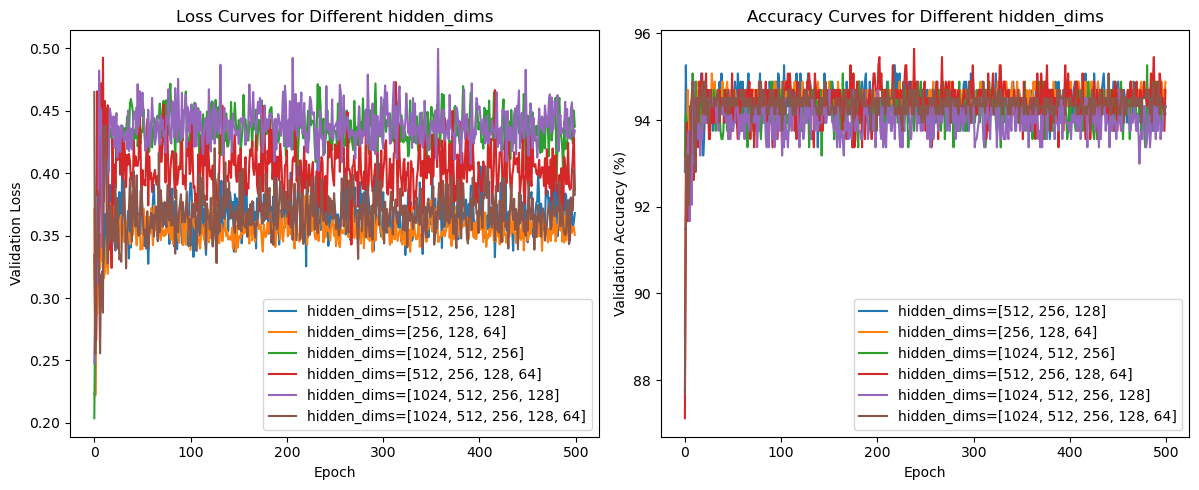

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


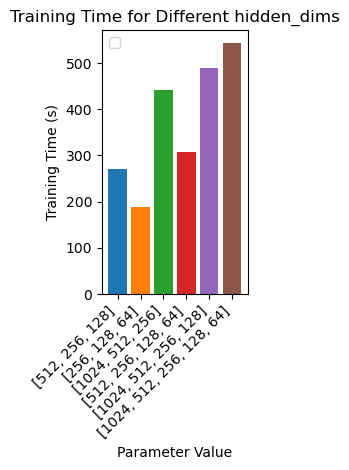

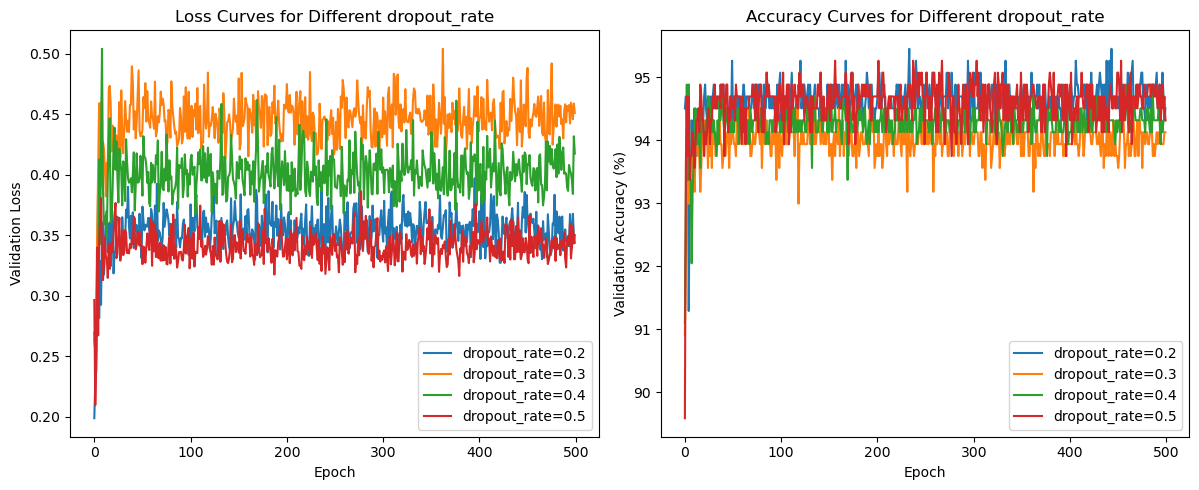

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


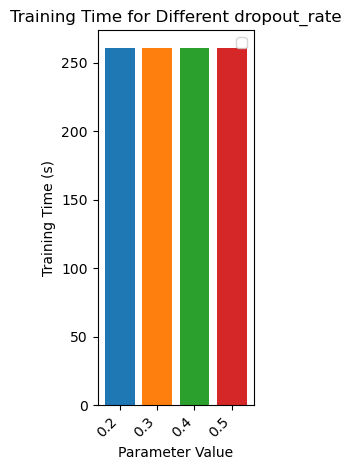

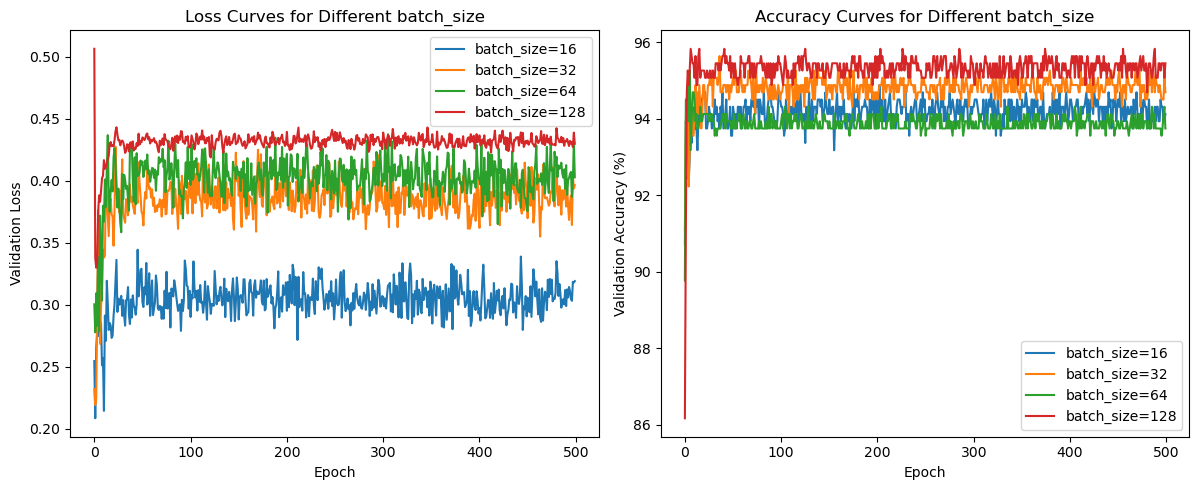

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


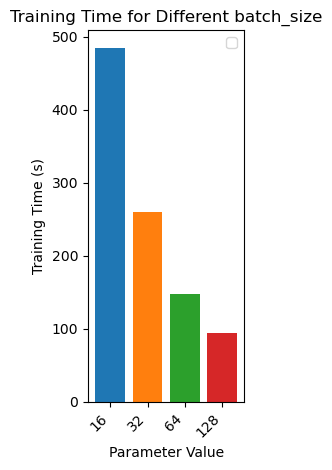

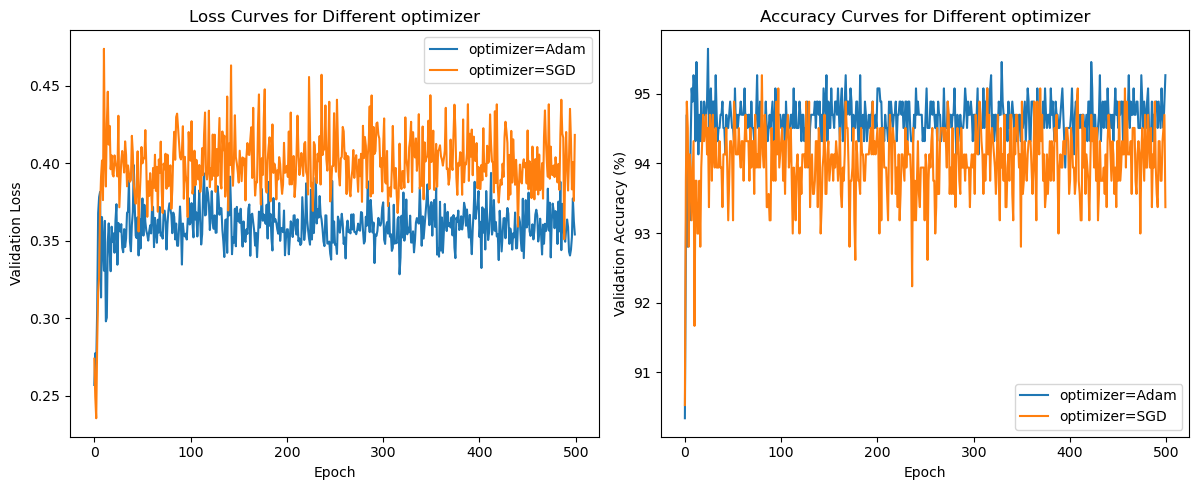

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


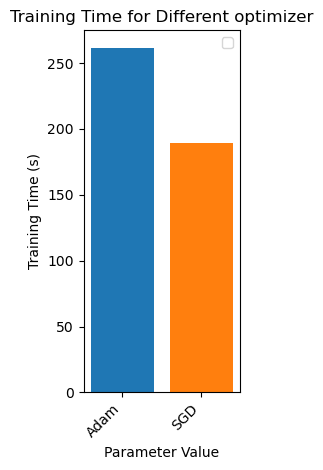

In [33]:
run_experiments()

以上在baseline的基础上分四个部分进行了超参数的修改，分别是（第一次实验结果可见最后）：

### 1. 隐藏层的设置

- 第一次训练：对比了不同隐藏层设置
  ``` python
  hidden_dims_list = [
        [512, 256, 128],
        [256, 128, 64],
        [1024, 512, 256],
        [512, 256, 128, 64],
        [1024,512,256,128],
        [1024,512,256,128,64]
    ]
  ```
  从结果来看，基本在20次迭代之后已经收敛，如果采用了early stopping在20前几乎必然会停下。 但为了控制变量，baseline和后续的数值实验设定没有加入early stopping的正则化方法。

  在validation_loss上，最后一个隐藏层的大小设为64的训练效果比>64的要好，最终要实现的是8维度的分类，可能最后输出的特征尺度不需要特别大。三层隐藏层深度[256,128,64]在训练集上达到的loss最低，但在Validation set上的泛化效果却不如四层的[512,256,128,64],[1024,512,256,128]设置，可能是过拟合的原因。
- 第二次训练：
  并没有发现在Accuracy Curves上面三四层有什么显著的差别。其余结论支持第一次训练效结论。
  时间上，三层[256, 128, 64]的训练时间最短，训练效率最高。综上，可以确定三层最优。
### 2. dropout率
取dropout=[0.2,0.3,0.4,0.5]
第一次实验：从dropout的设置来看，dropout率为0.3和0.5的设置在training set上实现了最低的loss，同时在validation set上达到了最高的预测准确率。

第二次实验：dropout = 0.2, 0.5有最低的loss，同时也有最高的预测检测率，推断可能0.2到0.3位置有一个局部的极小点，0.5的loss仍最低。四者在运行效率上没有显著区别。
### 3. batch_size
取batch_size=[16,32,64,128]
第一次实验：从batch_size的设置来看，取batch_size=16在training set上Loss最小，而且在validation set上预测准确率也较高。
而batch_size=128的较大的设定，虽然在训练集上loss略高于16,但也低于32,64,而且实现了较高的validation set的预测准确率

第二次实验：可以观察到较为明显的分层现象。尽管batch_size=16时，在training set上的loss却较低，但在validation set上的预测准确率却较高，说明存在过拟合的现象。比较推荐batch_size=32的设定。
训练时间上，batch_size与训练时间呈现明显的负相关（甚至是指数递减）的关系。

### 4. optimizer
第一次实验：更换了optimizer来看，SGD的性能似乎要优于Adams，loss更小而且预测准确率更高，但收敛速度似乎慢了一些。

第二次实验：得出了相反的结论，不太确定原因在哪里，值得一提的是SGD貌似training_time更低。


In [13]:
num_epochs = 150
# 5. 学习率实验
def learning_rate_experiment(logger):
    learning_rates = [0.1, 0.03, 0.01, 0.003, 0.001, 0.0003]
    for lr in learning_rates:
        print(f"\nTesting learning_rate: {lr}")
        model = DeepClassifier(input_dim=1838, hidden_dims=[256, 128, 64], output_dim=8)
        
        start_time = time.time()
        best_acc, final_acc, conv_epoch, loss_history, acc_history = train_classifier_with_history(
            model, train_loader, val_loader, optimizer_fn=lambda params: torch.optim.Adam(params, lr=lr), num_epochs = num_epochs)
        train_time = time.time() - start_time
        
        logger.add_result('learning_rate', lr, best_acc, final_acc, train_time, 
                        conv_epoch, loss_history, acc_history)
        
# 6. BatchNorm实验
def batchnorm_experiment(logger):
    batchnorm_options = [True, False]
    for use_batchnorm in batchnorm_options:
        print(f"\nTesting use_batchnorm: {use_batchnorm}")
        model = DeepClassifier(input_dim=1838, hidden_dims=[256, 128, 64], output_dim=8)
        if not use_batchnorm:
            for m in model.modules():
                if isinstance(m, nn.BatchNorm1d):
                    m.eval()
                    m.requires_grad_(False)       
        # 如果不使用BatchNorm，则冻结BatchNorm层的行为，但保留其在网络中的结构位置

        start_time = time.time()
        best_acc, final_acc, conv_epoch, loss_history, acc_history = train_classifier_with_history(
            model, train_loader, val_loader, optimizer_fn=lambda params: torch.optim.Adam(params, lr=0.001), num_epochs=num_epochs)
        train_time = time.time() - start_time

        logger.add_result('use_batchnorm', use_batchnorm, best_acc, final_acc, train_time, 
                        conv_epoch, loss_history, acc_history)
            
    # 7. 动量实验
def momentum_experiment(logger):
    momentums = [0.5, 0.9, 0.95, 0.99]
    for momentum in momentums:
        print(f"\nTesting momentum: {momentum}")
        model = DeepClassifier(input_dim=1838, hidden_dims=[256, 128, 64], output_dim=8)
        
        start_time = time.time()
        best_acc, final_acc, conv_epoch, loss_history, acc_history = train_classifier_with_history(
            model, train_loader, val_loader, optimizer_fn=lambda params: torch.optim.SGD(params, lr=0.01, momentum=momentum), num_epochs=num_epochs)
        train_time = time.time() - start_time
        
        logger.add_result('momentum', momentum, best_acc, final_acc, train_time, 
                        conv_epoch, loss_history, acc_history)
            
    # 8. 激活函数实验
def activation_experiment(logger): 
    activations = [nn.ReLU(), nn.Sigmoid(), nn.Tanh()]
    for activation in activations:
        print(f"\nTesting activation: {activation}")
        model = DeepClassifier(input_dim=1838, hidden_dims=[256, 128, 64], output_dim=8, activation=activation)

        start_time = time.time()
        best_acc, final_acc, conv_epoch, loss_history, acc_history = train_classifier_with_history(
            model, train_loader, val_loader, optimizer_fn=lambda params: torch.optim.Adam(params, lr=0.001), num_epochs=num_epochs)
        train_time = time.time() - start_time

        logger.add_result('activation', activation, best_acc, final_acc, train_time, 
                        conv_epoch, loss_history, acc_history)
        

            
experiment_list = [
    learning_rate_experiment,
    batchnorm_experiment,
    momentum_experiment,
    activation_experiment
]
def run_experiments_new():
    logger = ExperimentLogger()
    
    for experiment in experiment_list:
        experiment(logger)
    
    # 打印实验总结
    logger.print_summary()
    
    # 绘制训练曲线
    logger.plot_training_curves('learning_rate')
    logger.plot_training_curves('use_batchnorm')
    logger.plot_training_curves('momentum')
    logger.plot_training_curves('activation')






Testing learning_rate: 0.1


d:\anaconda3\Lib\site-packages\torch\optim\lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/150:
Val Loss: 0.7331, Val Acc: 74.81%
Epoch 2/150:
Val Loss: 0.8222, Val Acc: 76.33%
Epoch 3/150:
Val Loss: 1.0017, Val Acc: 61.74%
Epoch 4/150:
Val Loss: 0.9193, Val Acc: 77.27%
Epoch 5/150:
Val Loss: 1.1826, Val Acc: 58.90%
Epoch 6/150:
Val Loss: 1.0985, Val Acc: 63.07%
Epoch 7/150:
Val Loss: 1.0071, Val Acc: 61.17%
Epoch 8/150:
Val Loss: 0.9165, Val Acc: 67.61%
Epoch 9/150:
Val Loss: 0.9660, Val Acc: 67.23%
Epoch 10/150:
Val Loss: 1.0210, Val Acc: 65.91%
Epoch 11/150:
Val Loss: 0.8772, Val Acc: 68.75%
Epoch 12/150:
Val Loss: 0.9065, Val Acc: 65.72%
Epoch 13/150:
Val Loss: 1.0426, Val Acc: 56.44%
Epoch 14/150:
Val Loss: 0.9887, Val Acc: 66.67%
Epoch 15/150:
Val Loss: 0.8838, Val Acc: 66.48%
Epoch 16/150:
Val Loss: 0.9029, Val Acc: 67.23%
Epoch 17/150:
Val Loss: 0.9378, Val Acc: 66.86%
Epoch 18/150:
Val Loss: 0.9114, Val Acc: 67.61%
Epoch 19/150:
Val Loss: 0.8997, Val Acc: 67.99%
Epoch 20/150:
Val Loss: 0.8643, Val Acc: 67.80%
Epoch 21/150:
Val Loss: 0.8804, Val Acc: 67.80%
E

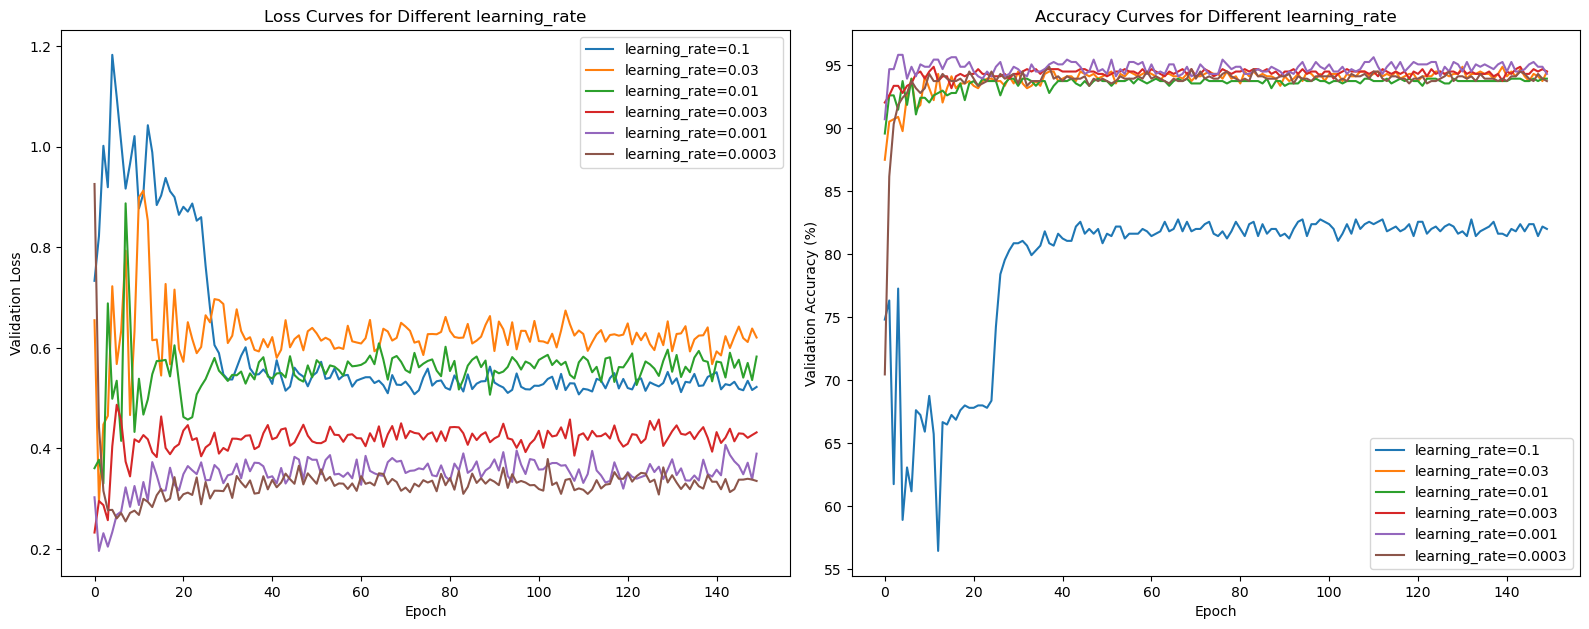

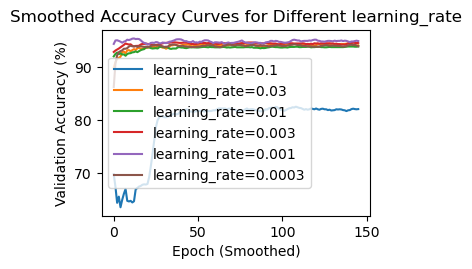

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


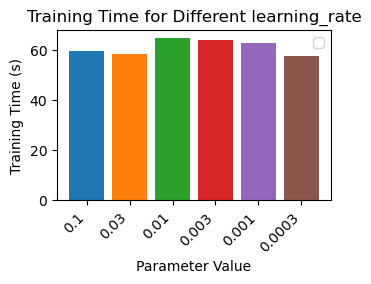

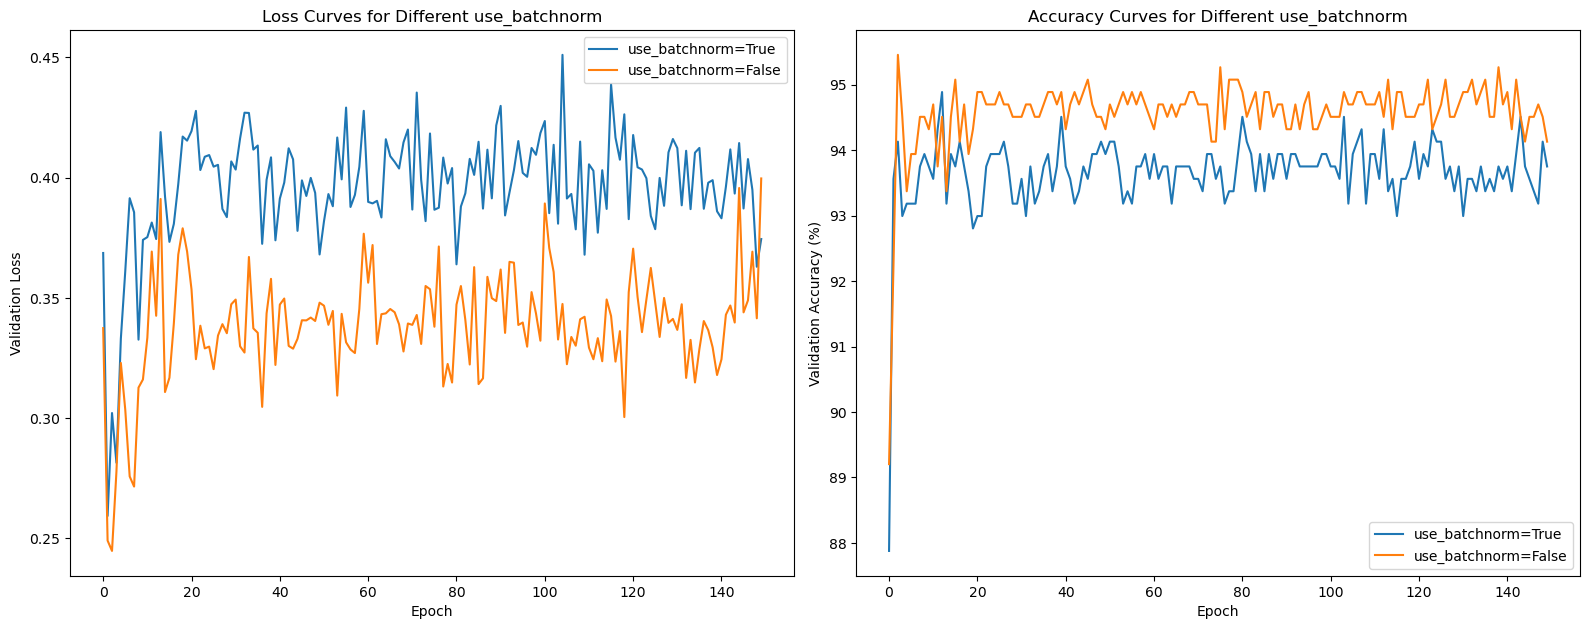

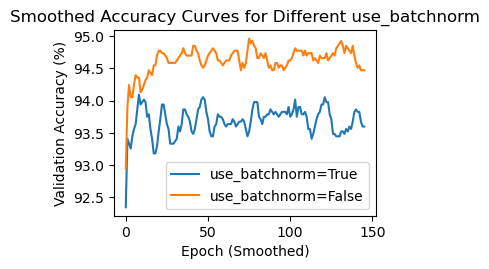

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


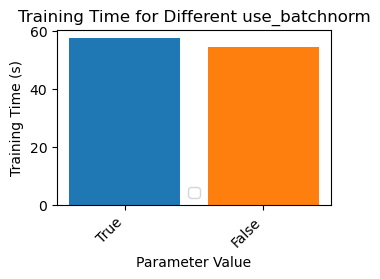

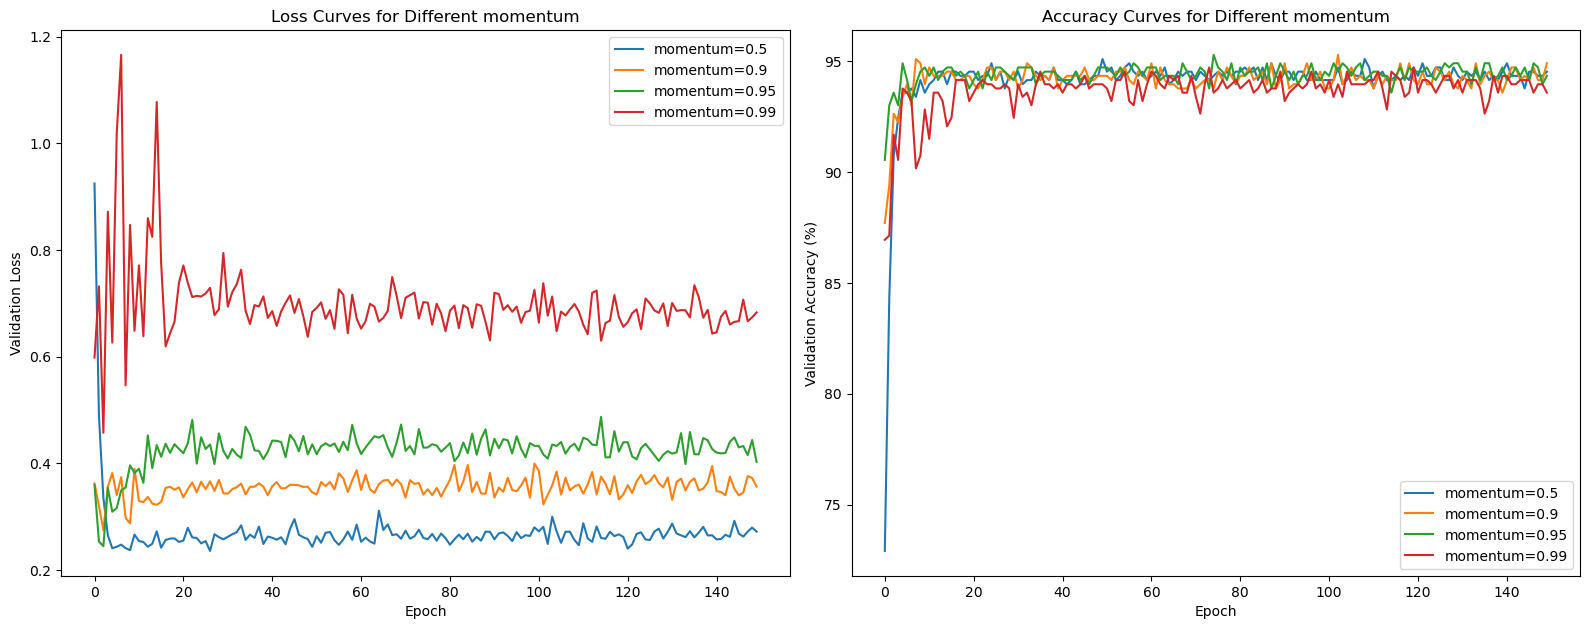

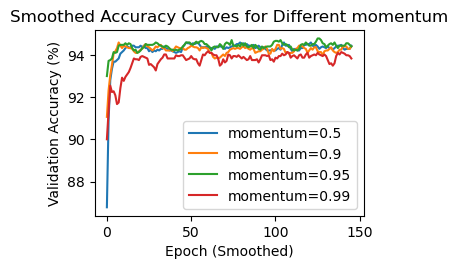

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


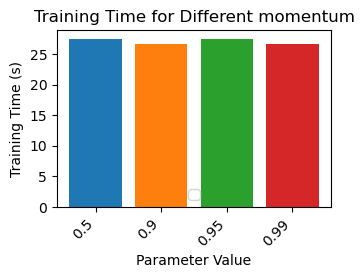

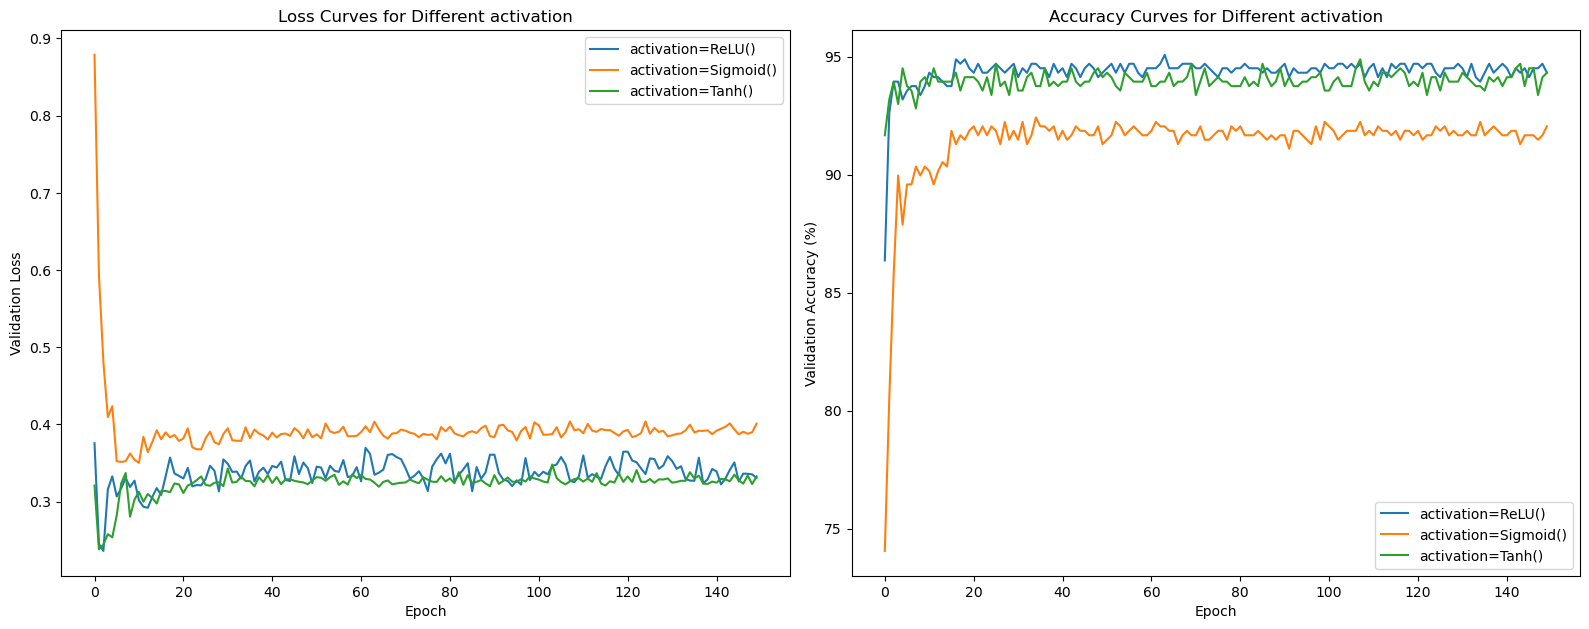

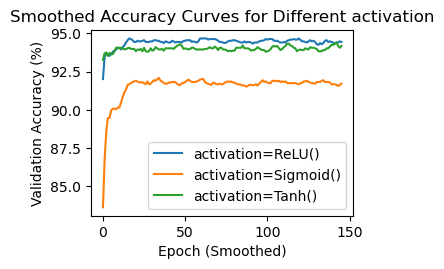

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


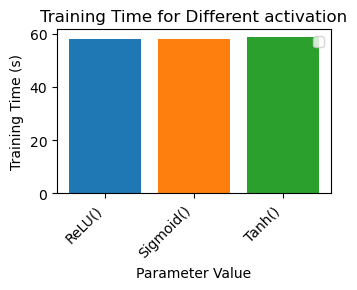

In [14]:
run_experiments_new()

### 5. Epoch Size
从分析出的前四组数据可以看出，所有的模拟在epoch为150前后已经趋于平稳，考虑到更多的模拟会大幅增加训练时间，所以选择epoch为150作为后四组数据的模拟参数。

### 6. Learning Rate
Learning Rate越低则测试的loss越低，收敛得也更快，lr = 0.001时，validation accuracy最高，lr = 0.1时accuracy显著最低，可能是在训练过程中进入了某个局部最优解。

### 7. Batchnorm 是否使用
出乎意料的是，反而是batchnorm不使用时loss更低，而且accuracy rate更好，但是二者差别不大。我们认为可能是因为batchnorm的作用是将数据变成方差为1的分布，而数据本身在$[-1, 10]$之间，且大多很接近0，可能变换后会消弭这一部分的差距，导致loss增加。

### 8. Momentum
Momentum越高则loss越高，momentum为0.99时accuracy最低。从数据上来看，momentum为0.5, 0.9和0.95的accuracy差别不大，最佳参数值为0.9。

### 9. Activation function
Activation为ReLU时，accuracy最高，tanh偏低，sigmoid的accuracy显著更低。猜测是因为sigmoid在$[-1, 10]$上变化最平缓，且最陡的部分在0附近，对本数据点起不到好的区分作用。况且ReLU的值域是 $[0, \infty]$，消除了数据中接近0的负值（对应基本不表达的基因），而保留了正值，加强了数据的特征。


## 总结：
基于以上分析，最好的参数集为：

- 网络隐藏层：[256, 128, 64]
- dropout: 0.5
- batchsize: 32
- optimizer: Adam/SGD
- 学习率：0.001
- Batchnorm: False
- Momentum: 0.9
- Activation: ReLU
  
以下将使用以上参数集进行训练

---------- Experiment Finale ----------


d:\anaconda3\Lib\site-packages\torch\optim\lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/150:
Val Loss: 0.6416, Val Acc: 75.76%
Epoch 2/150:
Val Loss: 0.2641, Val Acc: 91.86%
Epoch 3/150:
Val Loss: 0.2699, Val Acc: 92.99%
Epoch 4/150:
Val Loss: 0.2453, Val Acc: 93.75%
Epoch 5/150:
Val Loss: 0.3158, Val Acc: 93.37%
Epoch 6/150:
Val Loss: 0.3027, Val Acc: 93.18%
Epoch 7/150:
Val Loss: 0.2742, Val Acc: 94.51%
Epoch 8/150:
Val Loss: 0.2653, Val Acc: 94.51%
Epoch 9/150:
Val Loss: 0.2921, Val Acc: 93.75%
Epoch 10/150:
Val Loss: 0.2637, Val Acc: 95.27%
Epoch 11/150:
Val Loss: 0.2780, Val Acc: 94.70%
Epoch 12/150:
Val Loss: 0.2630, Val Acc: 95.45%
Epoch 13/150:
Val Loss: 0.2835, Val Acc: 95.08%
Epoch 14/150:
Val Loss: 0.2322, Val Acc: 95.45%
Epoch 15/150:
Val Loss: 0.3083, Val Acc: 94.70%
Epoch 16/150:
Val Loss: 0.2962, Val Acc: 95.64%
Epoch 17/150:
Val Loss: 0.2726, Val Acc: 95.45%
Epoch 18/150:
Val Loss: 0.3291, Val Acc: 95.08%
Epoch 19/150:
Val Loss: 0.3251, Val Acc: 94.89%
Epoch 20/150:
Val Loss: 0.3102, Val Acc: 95.27%
Epoch 21/150:
Val Loss: 0.3369, Val Acc: 94.51%
E

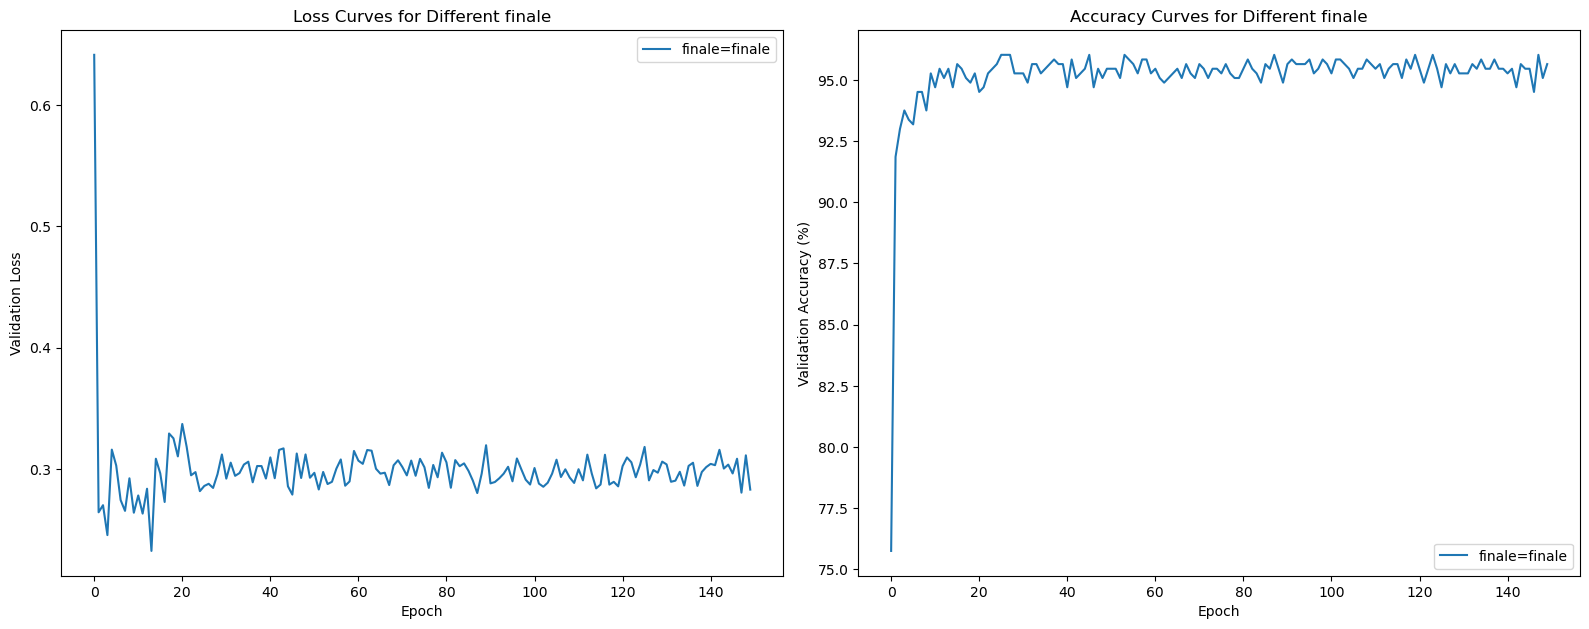

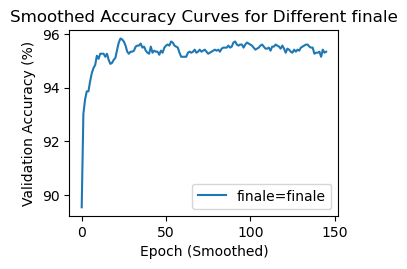

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


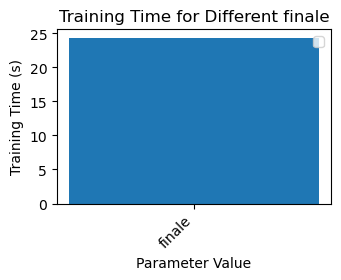

In [15]:
def experiment_finale():
    logger = ExperimentLogger()

    print("-" * 10, "Experiment Finale", "-" * 10)
    model = DeepClassifier(input_dim=1838, hidden_dims=[256, 128, 64], output_dim=8, use_batchnorm=False, activation=nn.ReLU())
    start_time = time.time()
    best_acc, final_acc, conv_epoch, loss_history, acc_history = train_classifier_with_history(
        model, train_loader, val_loader, optimizer_fn=lambda params: torch.optim.SGD(params, lr=0.01, momentum=0.9), num_epochs=num_epochs)
    train_time = time.time() - start_time

    logger.add_result('finale', 'finale', best_acc, final_acc, train_time, 
                      conv_epoch, loss_history, acc_history)
    
    logger.print_summary()
    logger.plot_training_curves('finale')


experiment_finale()

可以看到这个模型运行效率高（1.6 epochs/s），运行准确率高（大多稳定在95%以上），loss较低，是一个很好的模型。

## 附：前四组第一次实验的结果


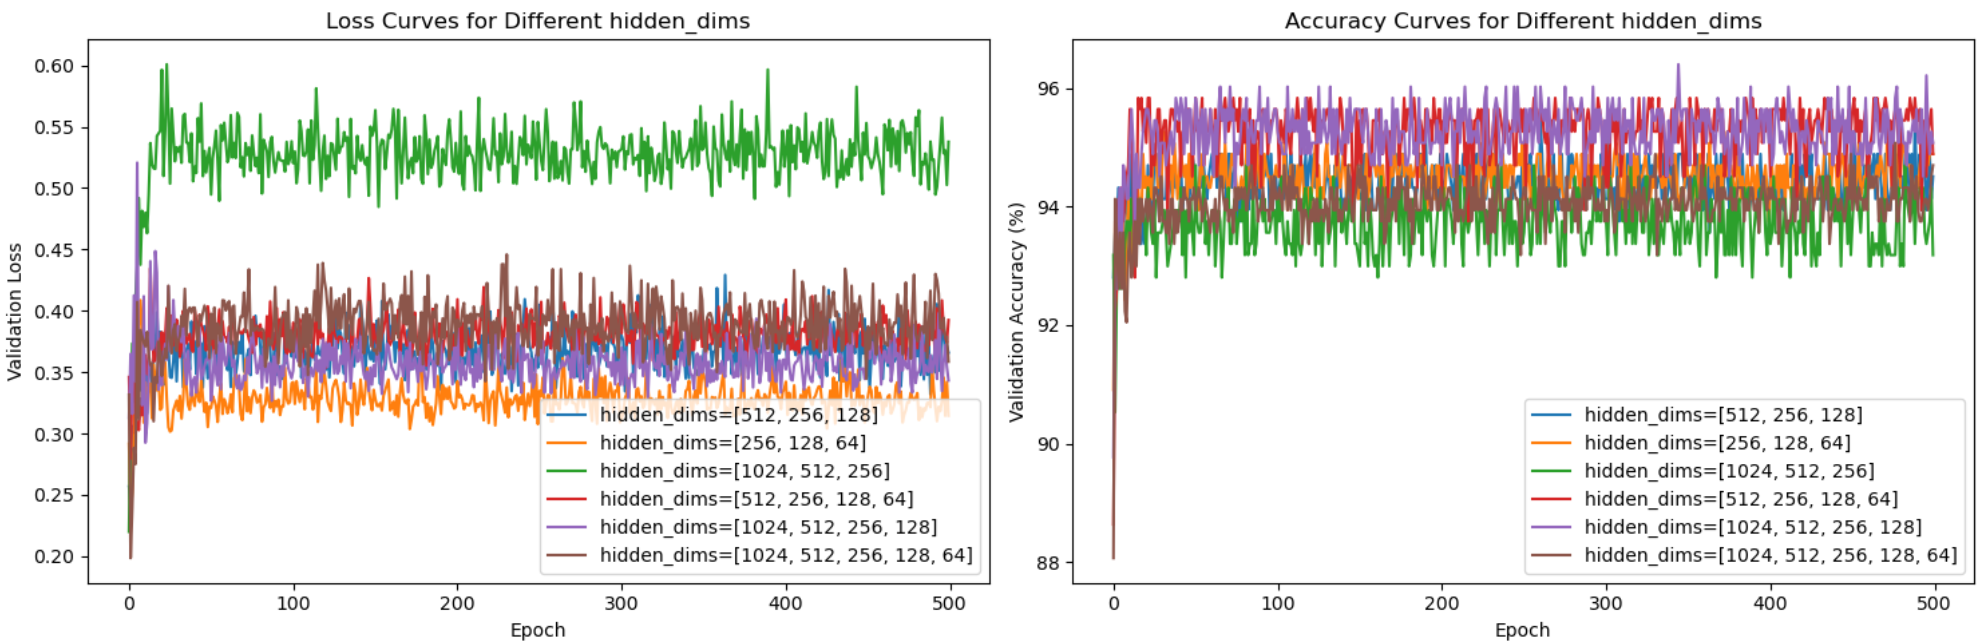

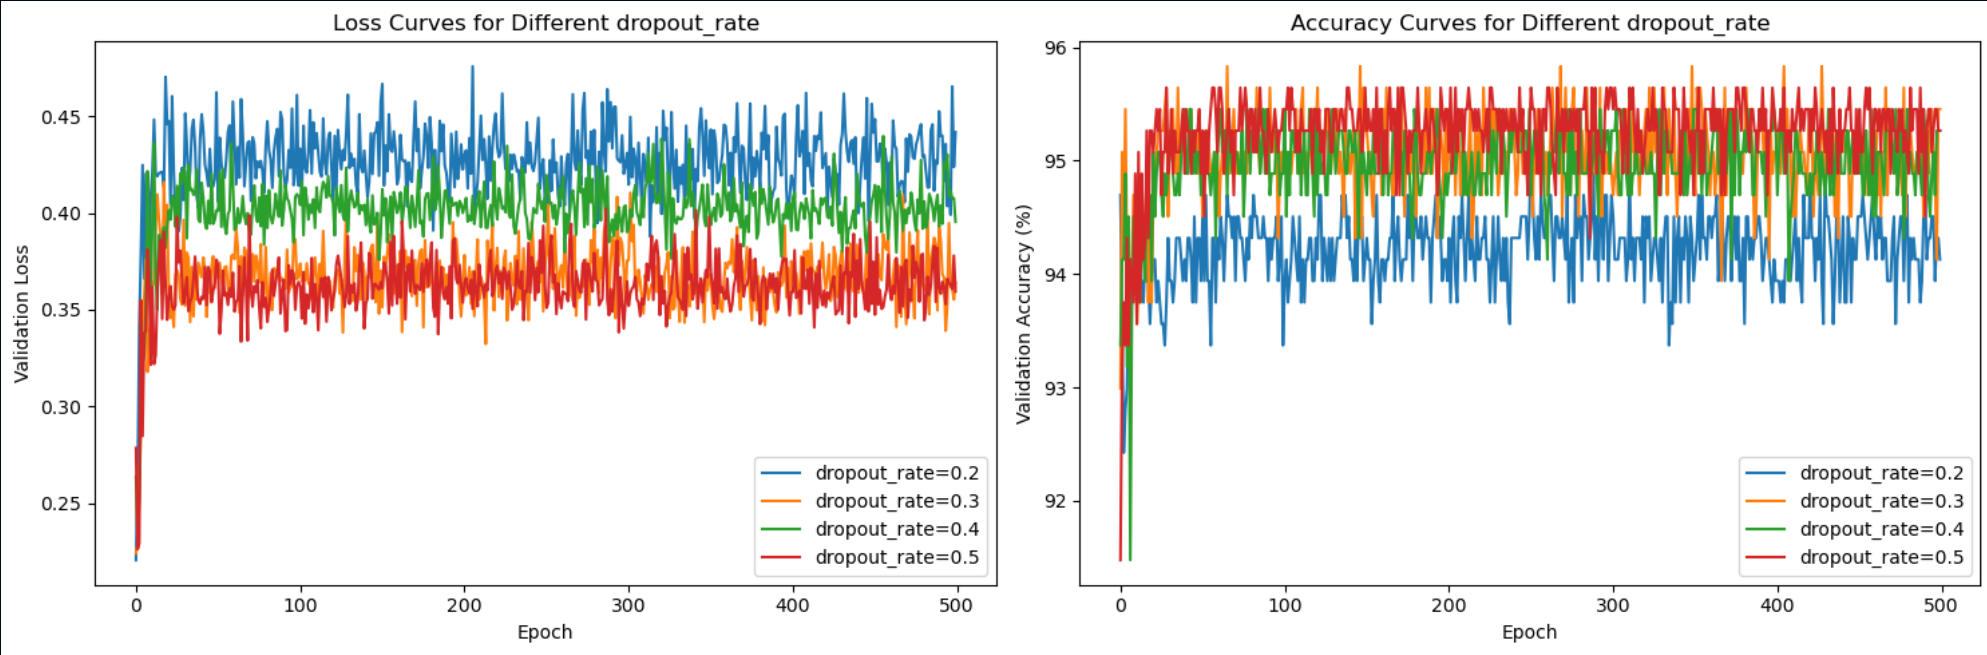

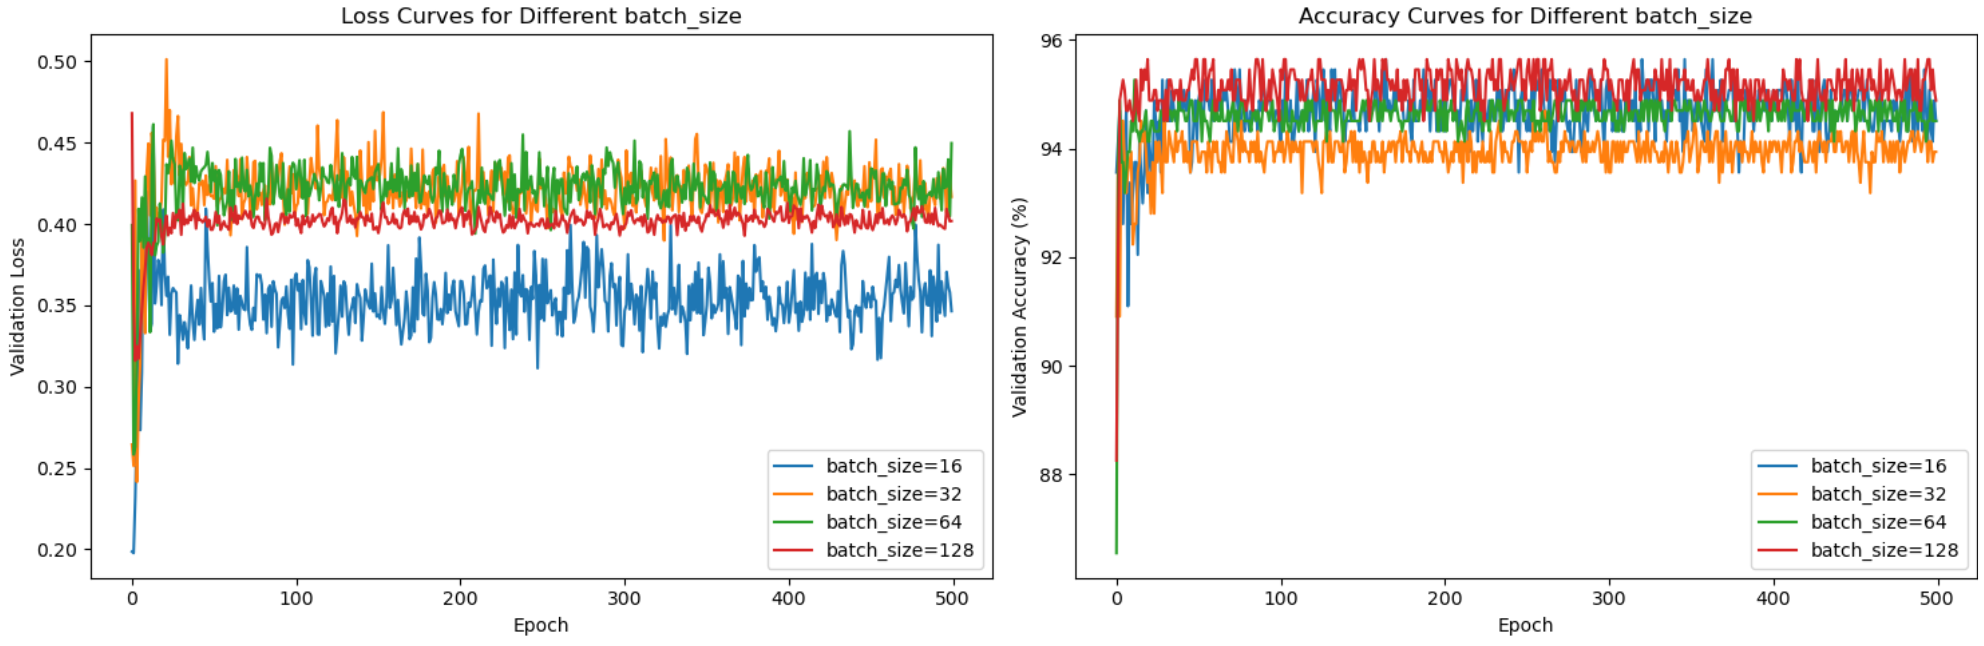

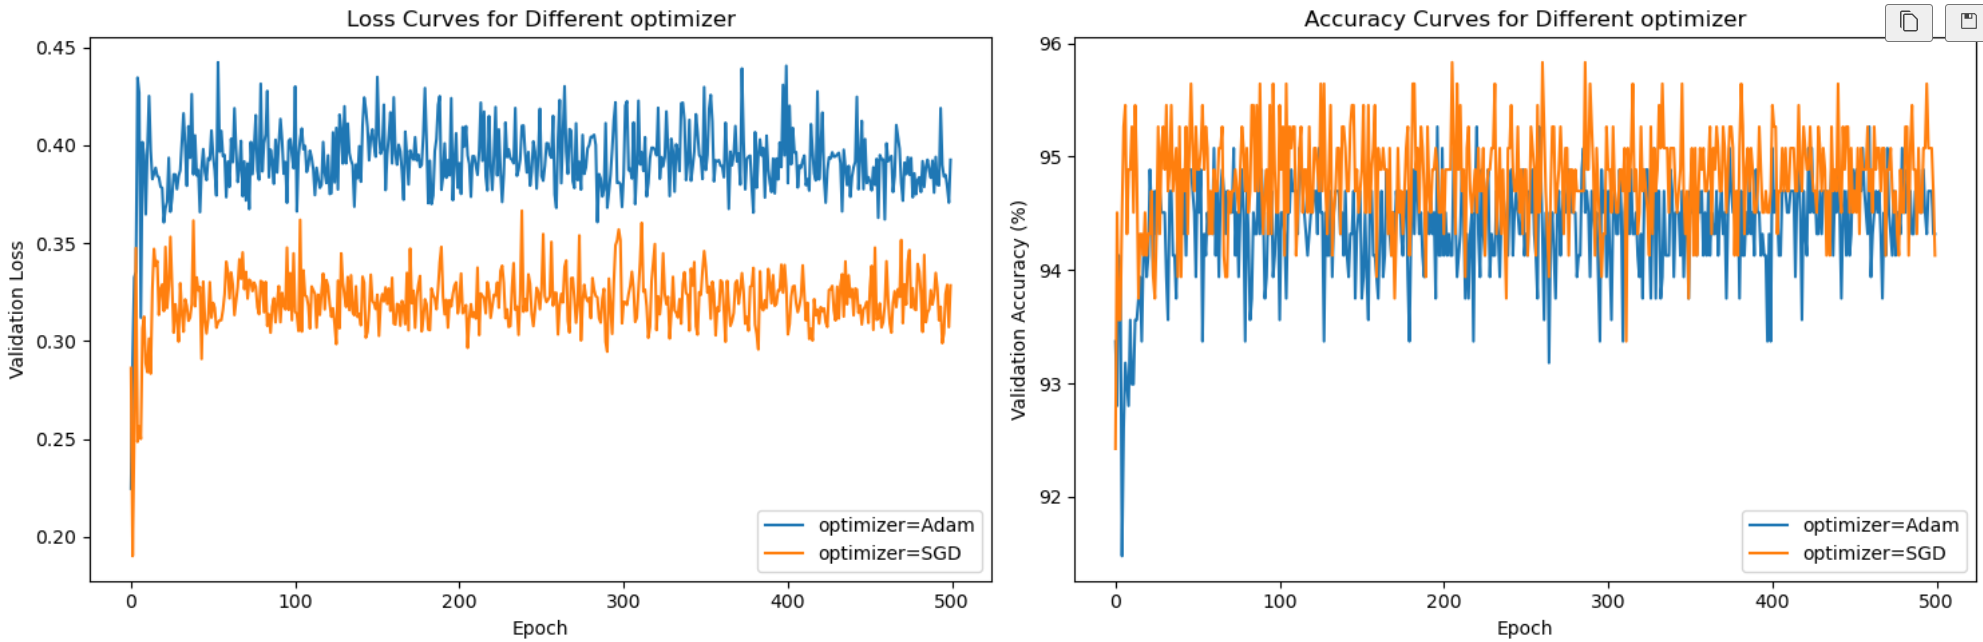